In [12]:
import pandas as pd
import numpy as np

In [13]:
data = pd.read_csv("../data/train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Feature engineering + data cleaning

In [16]:
keyFactors = [

          # Identifiant (à conserver pour référence)
        'Id',
        
        # Variables structurelles essentielles
        'OverallQual',      # Qualité générale
        'OverallCond',      # Condition générale
        'YearBuilt',        # Année de construction 
        'YearRemodAdd',     # Année de rénovation
        
        # Surfaces
        'GrLivArea',        # Surface habitable
        'TotalBsmtSF',      # Surface totale du sous-sol
        'LotArea',          # Surface du terrain
        
        # Garage et extérieur
        'GarageArea',       # Surface du garage
        'GarageCars',       # Capacité du garage en voitures
        'GarageYrBlt',      # Année de construction du garage
        'GarageType',       # Type de garage
        'GarageFinish',     # Finition du garage
        
        # Pièces et salles de bain
        'FullBath',         # Salles de bain complètes
        'HalfBath',         # Demi-salles de bain
        'BedroomAbvGr',     # Chambres au-dessus du sol
        'KitchenAbvGr',     # Cuisines au-dessus du sol
     
        # Qualité
        'KitchenQual',      # Qualité de la cuisine
        'ExterQual',        # Qualité extérieure
        'ExterCond',        # Condition extérieure
        'BsmtCond',         # Condition du sous-sol
        'HeatingQC',        # Qualité du chauffage
        
        # Localisation
        'Neighborhood',     # Quartier
        'MSZoning',         # Zonage
        
        # Caractéristiques additionnelles de valeur
        'Fireplaces',       # Nombre de cheminées
        'FireplaceQu',      # Qualité des cheminées
        'WoodDeckSF',       # Surface de la terrasse en bois
        'OpenPorchSF',      # Surface du porche ouvert
        'Foundation',       # Type de fondation
        'CentralAir',       # Climatisation centrale
        
        # Variables de vente (pour l'entraînement)

        'SaleType',         # Type de vente
        'SaleCondition',    # Condition de vente
        'MiscFeature',        # Commonditer qui ne figure pas details
        
        # target
        'SalePrice'

]

In [17]:
df = data.copy()[keyFactors]
df.set_index("Id", inplace=True)
df.head()

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GrLivArea,TotalBsmtSF,LotArea,GarageArea,GarageCars,GarageYrBlt,...,Fireplaces,FireplaceQu,WoodDeckSF,OpenPorchSF,Foundation,CentralAir,SaleType,SaleCondition,MiscFeature,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,7,5,2003,2003,1710,856,8450,548,2,2003.0,...,0,NaN,0,61,PConc,Y,WD,Normal,NaN,208500
2,6,8,1976,1976,1262,1262,9600,460,2,1976.0,...,1,TA,298,0,CBlock,Y,WD,Normal,NaN,181500
3,7,5,2001,2002,1786,920,11250,608,2,2001.0,...,1,TA,0,42,PConc,Y,WD,Normal,NaN,223500
4,7,5,1915,1970,1717,756,9550,642,3,1998.0,...,1,Gd,0,35,BrkTil,Y,WD,Abnorml,NaN,140000
5,8,5,2000,2000,2198,1145,14260,836,3,2000.0,...,1,TA,192,84,PConc,Y,WD,Normal,NaN,250000


### Let's add some features !
we have some redundants features storing the same values and sharing the information. Those columns can be merged by selected the second column.

In [18]:
data[['Exterior1st', 'Exterior2nd', 'Condition1', 'Condition2']]

,Exterior1st,Exterior2nd,Condition1,Condition2
0,VinylSd,VinylSd,Norm,Norm
1,MetalSd,MetalSd,Feedr,Norm
2,VinylSd,VinylSd,Norm,Norm
3,Wd Sdng,Wd Shng,Norm,Norm
4,VinylSd,VinylSd,Norm,Norm
...,...,...,...,...
1455,VinylSd,VinylSd,Norm,Norm
1456,Plywood,Plywood,Norm,Norm
1457,CemntBd,CmentBd,Norm,Norm
1458,MetalSd,MetalSd,Norm,Norm


In [19]:
df.loc[:,'Exterior'] = data['Exterior2nd'].values
df.loc[:,'Condition'] = data['Condition2'].values

We can also add the house's lifespan from the build year till the purchase

In [20]:
df["Lifespan"] = np.int64(data["YrSold"] - data["YearBuilt"])
df.fillna({"LifeSpan": 0}, inplace=True) # there is no duration when the result is NA
#####
df = df[df.columns.sort_values()] # sorts the columns in alphabetic order
df.head(3)

,BedroomAbvGr,BsmtCond,CentralAir,Condition,ExterCond,ExterQual,Exterior,FireplaceQu,Fireplaces,Foundation,...,OpenPorchSF,OverallCond,OverallQual,SaleCondition,SalePrice,SaleType,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd
Id,,,,,,,,,,,,,,,,,,,,,
1,3,TA,Y,Norm,TA,Gd,VinylSd,NaN,0,PConc,...,61,5,7,Normal,208500,WD,856,0,2003,2003
2,3,TA,Y,Norm,TA,TA,MetalSd,TA,1,CBlock,...,0,8,6,Normal,181500,WD,1262,298,1976,1976
3,3,TA,Y,Norm,TA,Gd,VinylSd,TA,1,PConc,...,42,5,7,Normal,223500,WD,920,0,2001,2002


### Data cleaning

In [21]:
# removing duplicates and checking missing values
df.drop_duplicates(inplace=True)
a = df.isna().sum()
a[a>0]

BsmtCond          37
FireplaceQu      690
GarageFinish      81
GarageType        81
GarageYrBlt       81
MiscFeature     1406
dtype: int64

samples having **NA** values means that that feature does not exist for that house. these values won't be dropped but will be replaced by "empty" and encoded during the process.

In [22]:
## replaces the NA with "Empty"
def fill_missing_values(df: pd.DataFrame) -> pd.DataFrame:
    temp = df.copy()
    cols_with_empty_values = a[a>0].index
    for c in cols_with_empty_values:
            temp[c] = temp[c].fillna("Empty")
    return temp

df = fill_missing_values(df)

In [23]:
# let's check values type for each sample
def check(df: pd.DataFrame):
    temp = df.dropna(axis=0)
    print("start cheking ...")
    for col in temp.columns:
        if temp[col].dtype == np.int64:
            try:
                np.int64(temp[col])
            except Exception as e:
                print(f"'{col.capitalize()}' feature should have int64 type for all samples")
        elif temp[col].dtype == np.float64:
            try:
                np.float64(temp[col])
            except Exception as e:
                print(f"'{col.capitalize()}' feature should have float64 type for all samples")
        else :
            try:
                np.object_(temp[col])
            except Exception as e:
                print(f"'{col.capitalize()}' feature should have object type for all samples")
    print("All columns are checked ")

check(df)
print(f"we have {df.shape[0]} samples and {df.shape[1]} features with the houses id set as index")

start cheking ...
All columns are checked 
we have 1460 samples and 36 features with the houses id set as index


let's repeat the sama data manipulation with the test set

In [24]:
## importing data
test_data = pd.read_csv("../data/test.csv")
df_test = test_data.copy()[keyFactors[:-1]]
df_test.set_index("Id", inplace=True)

## feature engineering
df_test.loc[:,'Exterior'] = test_data['Exterior2nd'].values
df_test.loc[:,'Condition'] = test_data['Condition2'].values
df_test.loc[:,"Lifespan"] = np.int64(test_data["YrSold"] - test_data["YearBuilt"])
df_test.fillna({"LifeSpan": 0}, inplace=True) # there is no duration when the result is NA
df_test = df_test[df_test.columns.sort_values()] # sorts the columns in alphabetic order

# removing duplicates and checking missing values
df_test.drop_duplicates(inplace=True)
df_test = fill_missing_values(df_test)
check(df_test)

start cheking ...
All columns are checked 


## Data exploration
we will display the insights and highlight how the selected features are relevant for the sale price prediction.
features are categorized into nine(9) parts:
* **Essential structural variables** : *'OverallQual'*, *'OverallCond'*, *'YearBuilt'*, *'YearRemodAdd'*
* **Surfaces** : *GrLivArea*, *TotalBsmtSF*, *LotArea*  
* **Garage and Exterior** : *GarageArea*, *GarageCars*, *GarageYrBlt*, *GarageType*, *GarageFinish*  
* **Rooms and Bathrooms** : *FullBath*, *HalfBath*, *BedroomAbvGr*, *KitchenAbvGr*  
* **Quality** : *KitchenQual*, *ExterQual*, *ExterCond*, *BsmtCond*, *HeatingQC*  
* **Location** : *Neighborhood*, *MSZoning*  
* **Additional Value Features** : *Fireplaces*, *FireplaceQu*, *WoodDeckSF*, *OpenPorchSF*, *Foundation*, *CentralAir*  
* **Sales Variables (for training)** : *SaleType*, *SaleCondition*, *MiscFeature*  
* **Created features** : *Exterior*, *LifeSpan*, *Condition*  

## ImmoSense model conception

first, let's cast our continuous or categorical data into dummy version (true or false state)

In [25]:
target = df.copy()["SalePrice"]
df.drop("SalePrice", axis=1, inplace=True)
dummy = pd.get_dummies(df)
dummy.shape

(1460, 237)

let's split it inton train and test set

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(dummy, target ,test_size=0.2, shuffle=False)

let's pick the best model for our study case between:
* **Linear Regression**
* **SVR**
* **Ridge**
* **Nearest neighbors regression**
* **Decision trees**

In [27]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
models = {
    "Linear_regression": LinearRegression(),
    "KNR": KNeighborsRegressor(),
    "SVR": SVR(kernel="linear"),
    "Ridge": Ridge(alpha=0.5),
    "Decision": DecisionTreeRegressor()
}    

In [28]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
def check_perf(model_list: dict, x_train, y_train, x_test, y_test) -> pd.DataFrame:
    rmse_tab, mae_tab, r_2_tab, score_tab = [], [], [], []
    
    for mod in model_list.values():
        mod.fit(x_train, y_train) # training thre model with training data
        y_pred = mod.predict(x_test) # prediction with samples splitted for test
        
        ## --- some metrics to evaluate model's prediction
        rmse_tab.append(round(root_mean_squared_error(y_test, y_pred),2)) 
        mae_tab.append(round(mean_absolute_error(y_test, y_pred), 2)) 
        r_2_tab.append(round(r2_score(y_test, y_pred),3))
        score_tab.append(f'{mod.score(x_train, y_train)*100}%') # training score
        
    return pd.DataFrame({
                        "RMSE": rmse_tab,
                        "Mae": mae_tab,
                        "R2": r_2_tab,
                        "Scores": score_tab
                        }, index=model_list.keys())


In [29]:
check_perf(models, x_train, y_train, x_test, y_test)

,RMSE,Mae,R2,Scores
Linear_regression,47795.86,21525.66,0.659,90.68740919880027%
KNR,54391.95,32027.38,0.559,78.8342045503819%
SVR,53309.98,27705.04,0.576,76.43341026497488%
Ridge,47291.48,21300.28,0.666,90.62650697066736%
Decision,53524.66,29159.21,0.573,99.99961203171591%


if we compare the metrics above we notice that the **Ridge_regression model** has a lower **mean error** with a quite acceptable **training score**. So **ImmoSense** model will be : **"Ridge"**. for better result, let's choose the best parameter for **ImmoSense**

In [30]:
from sklearn.model_selection import GridSearchCV
immoSense_test = Ridge()
params = {"alpha": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
gd = GridSearchCV(immoSense_test, param_grid=params, cv=5, n_jobs=-1, scoring="r2")
gd.fit(x_train, y_train)
print(f"the best alpha parameter is {gd.best_params_} with a best score trianing score of {gd.best_score_*100:.2f}% ")

the best alpha parameter is {'alpha': 1.0} with a best score trianing score of 84.76% 


In [31]:
## Training ImmoSense model with best estimator and best params
ImmoSense = Ridge(1.0)
ImmoSense.fit(x_train, y_train)
print("ImmoSense well trained")

ImmoSense well trained


## Final prediction
let's predict prices with the test_set file

In [32]:
df_test.ffill(inplace=True)
dummy_test = pd.get_dummies(df_test)
dummy_test = dummy_test.reindex(columns=dummy.columns, fill_value=0)
prices = ImmoSense.predict(dummy_test)
pd.DataFrame({"SalePrice": np.int64(prices)}, index=dummy_test.index).to_csv("../data/submission.csv",sep=",",header=True)
print("Submission file generated successfully !")

Submission file generated successfully !


# Make an histogram with submissions data

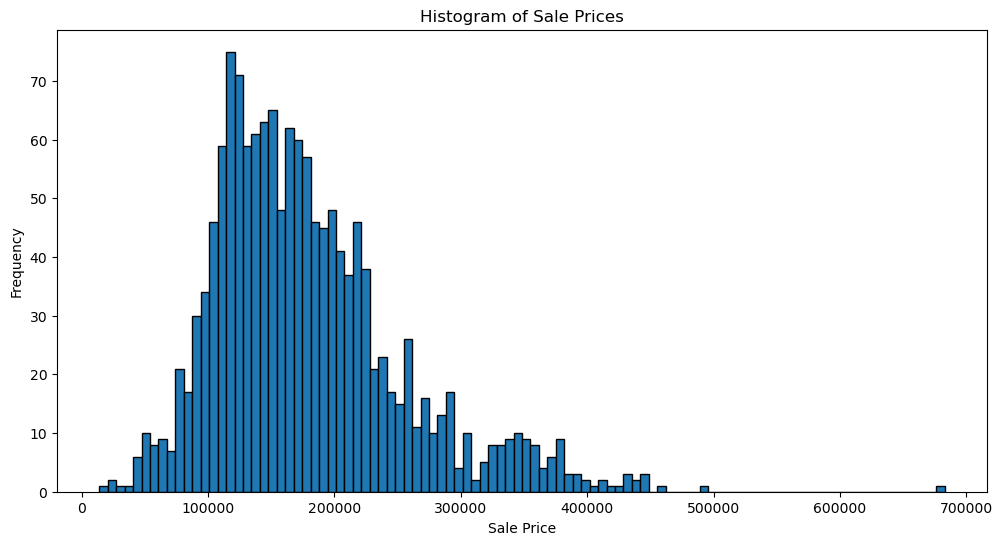

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Readin the submission file
df = pd.read_csv("../data/submission.csv")

# Plotting the histogram
# plt.hist(df["SalePrice"], bins=50)
# plt.title("Sale Price Distribution")
# plt.xlabel("Sale Price")
# plt.ylabel("Frequency")
# plt.show()

# Create the histogram
plt.figure(figsize=(12, 6))
plt.hist(df['SalePrice'], bins=100, edgecolor='black')

# Add title and labels
plt.title('Histogram of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')

# Show the plot
plt.show()



In [ ]:
import pickle

# Supposons que tu choisis le modèle ayant le meilleur score, par exemple, LinearRegression
best_model = models["Linear_regression"]
best_model.fit(x_train, y_train)

# Sauvegarde du modèle dans un fichier .pkl
with open("immoSense.pkl", "wb") as file:
    pickle.dump(best_model, file)

print("Modèle sauvegardé dans 'house_price_model.pkl'")


Modèle sauvegardé dans 'house_price_model.pkl'
